In [321]:
import pandas as pd
import numpy as np
import scipy
import datetime

# models
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# metrics
from sklearn.metrics import davies_bouldin_score, silhouette_samples, silhouette_score 

#helpers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, f1_score

# plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Dataset - Mushroom

In [74]:
# Import Datasets
mushroom_df = pd.read_csv('data/mushrooms.csv')
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [75]:
# Frequency distribution of habitat classes
pd.crosstab(index=mushroom_df["habitat"], columns="count")

col_0,count
habitat,
d,3148
g,2148
l,832
m,292
p,1144
u,368
w,192


In [76]:
# Create feature and target dataframes
# - apply one-hot encoding to categorical columns
# - separate the feature and target data
feature_cols = mushroom_df.columns.drop('habitat')
feature_df = pd.get_dummies(mushroom_df[feature_cols])
target_outcome = mushroom_df['habitat']

mush_final = pd.get_dummies(mushroom_df)

In [105]:
mush_rescaled = preprocessing.normalize(mush_final)

# Clustering

## k-means clustering

- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

For n_clusters = 2 The average silhouette_score is : 0.18032497195138614
For n_clusters = 4 The average silhouette_score is : 0.2297354470566609
For n_clusters = 7 The average silhouette_score is : 0.2842411951100424
For n_clusters = 8 The average silhouette_score is : 0.3009593029181605
For n_clusters = 9 The average silhouette_score is : 0.30900912219948223
For n_clusters = 10 The average silhouette_score is : 0.25375275015256477


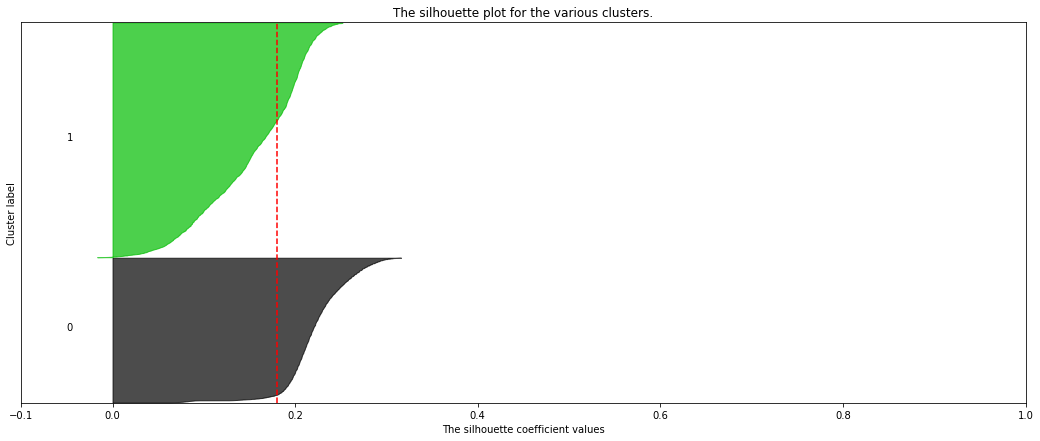

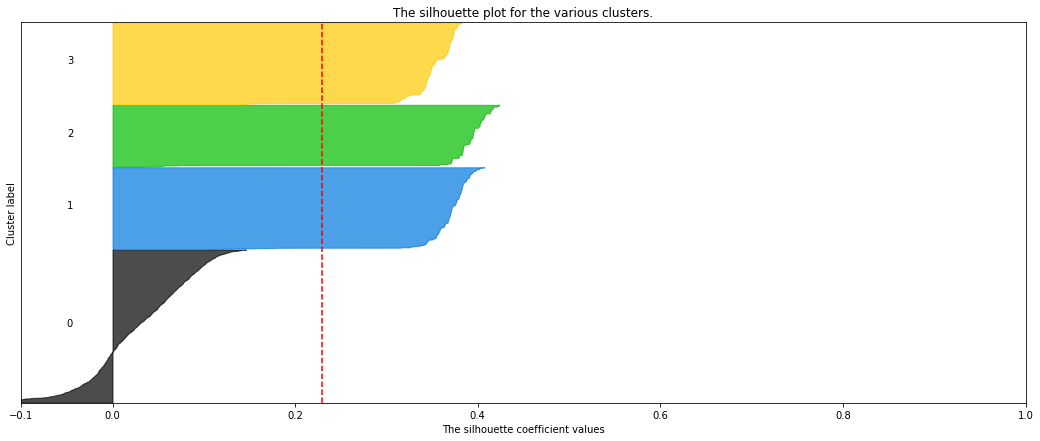

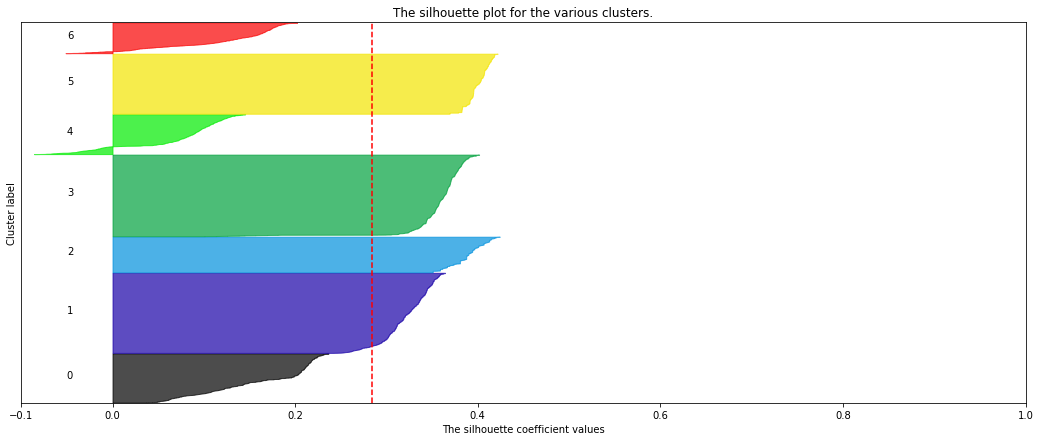

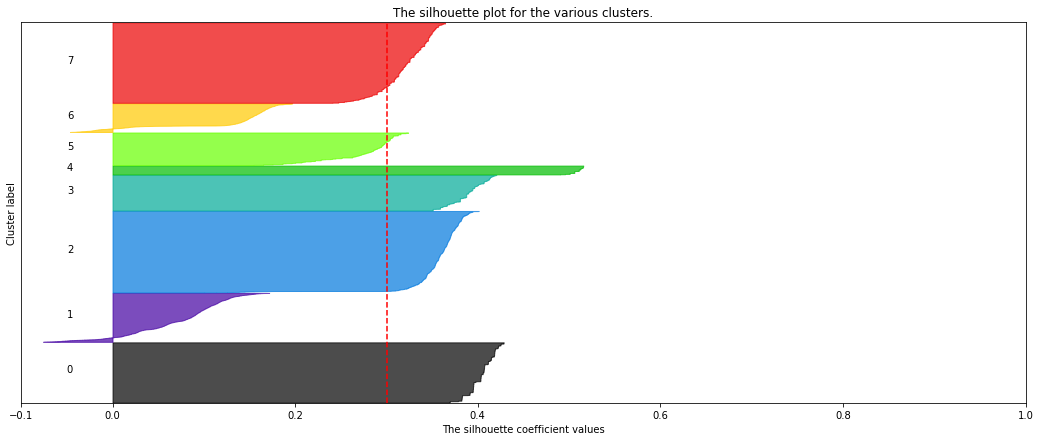

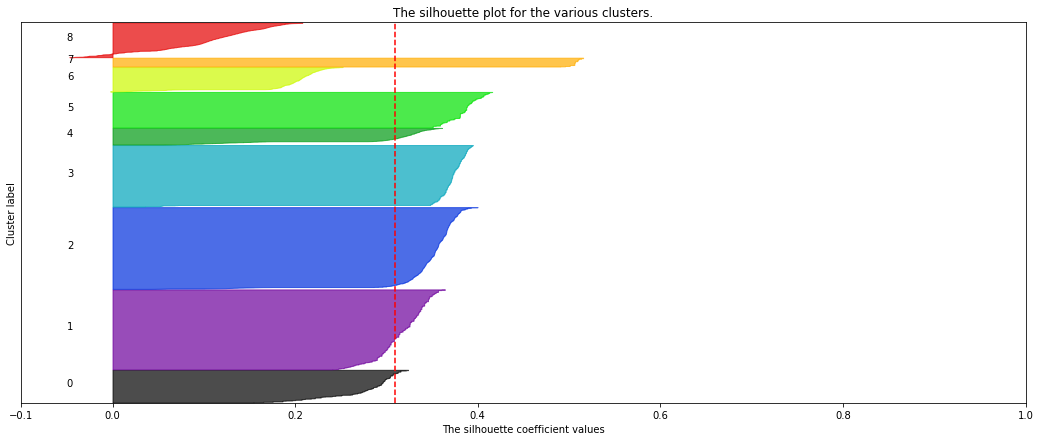

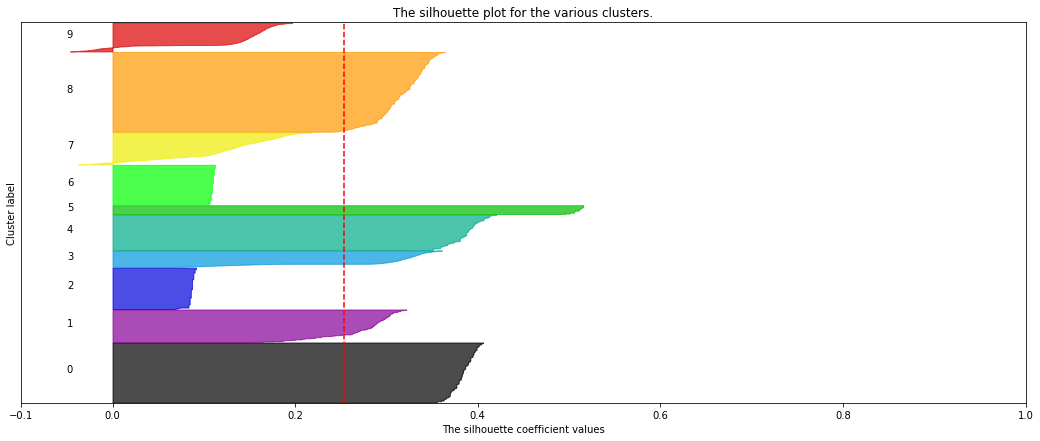

In [336]:
X = mush_rescaled

range_n_clusters = [2, 4, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [337]:
# Davies Bouldin Score
X = mush_rescaled

range_n_clusters = [2, 4, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average davies_bouldin_score is :", davies_bouldin_avg)

For n_clusters = 2 The average davies_bouldin_score is : 2.090628923792367
For n_clusters = 4 The average davies_bouldin_score is : 1.8197483771018779
For n_clusters = 7 The average davies_bouldin_score is : 1.8809044557350043
For n_clusters = 8 The average davies_bouldin_score is : 1.7140915371848817
For n_clusters = 9 The average davies_bouldin_score is : 1.610694784311928
For n_clusters = 10 The average davies_bouldin_score is : 1.9141110982414222


## Expectation Maximization
- https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
- https://www.kaggle.com/charel/learn-by-example-expectation-maximization

For n_clusters = 2 The average silhouette_score is : 0.16171757922663937
For n_clusters = 4 The average silhouette_score is : 0.2301959169286131
For n_clusters = 5 The average silhouette_score is : 0.2602636414815196
For n_clusters = 6 The average silhouette_score is : 0.27730679273884495
For n_clusters = 7 The average silhouette_score is : 0.2803444427590367
For n_clusters = 8 The average silhouette_score is : 0.22040907021244255
For n_clusters = 9 The average silhouette_score is : 0.16707766634920193


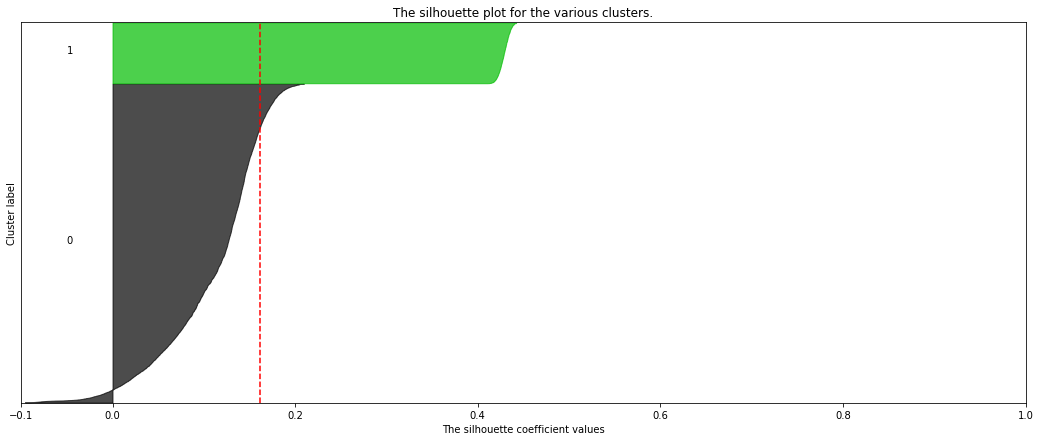

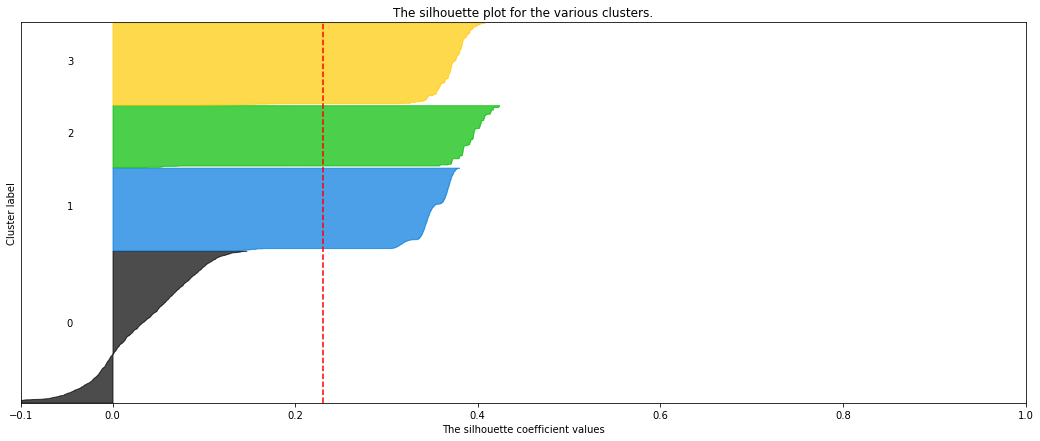

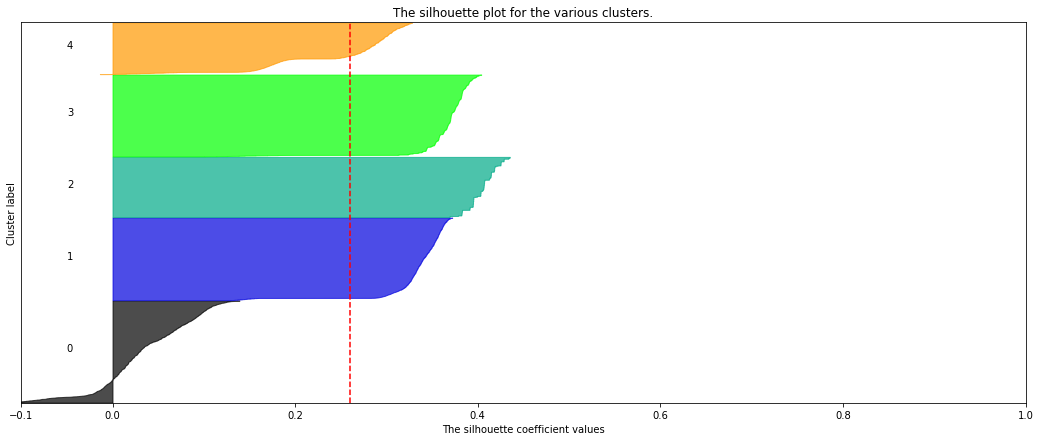

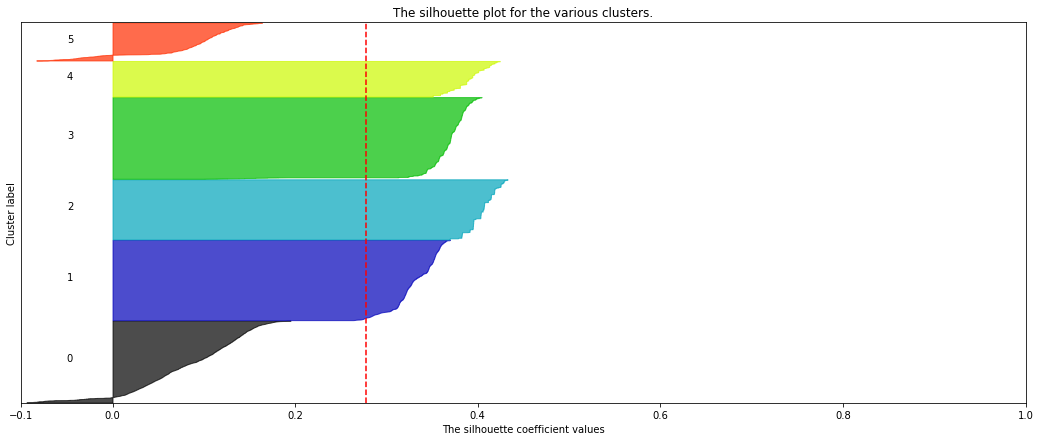

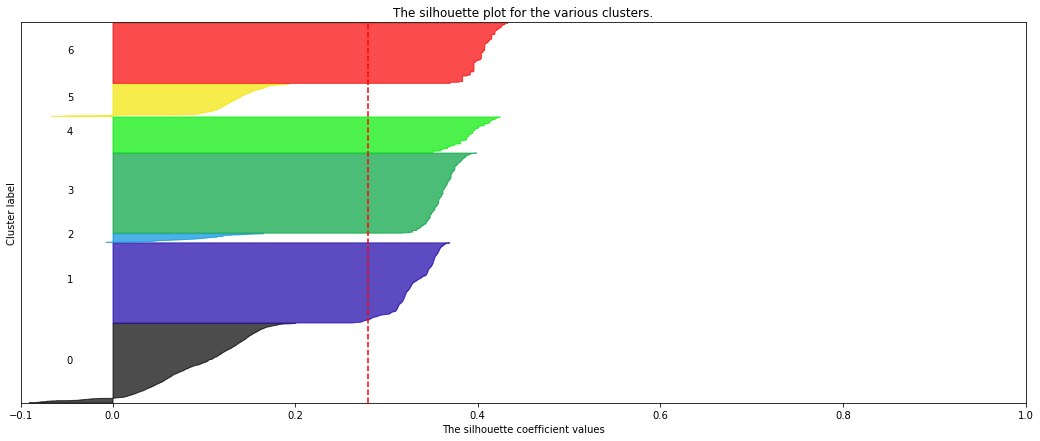

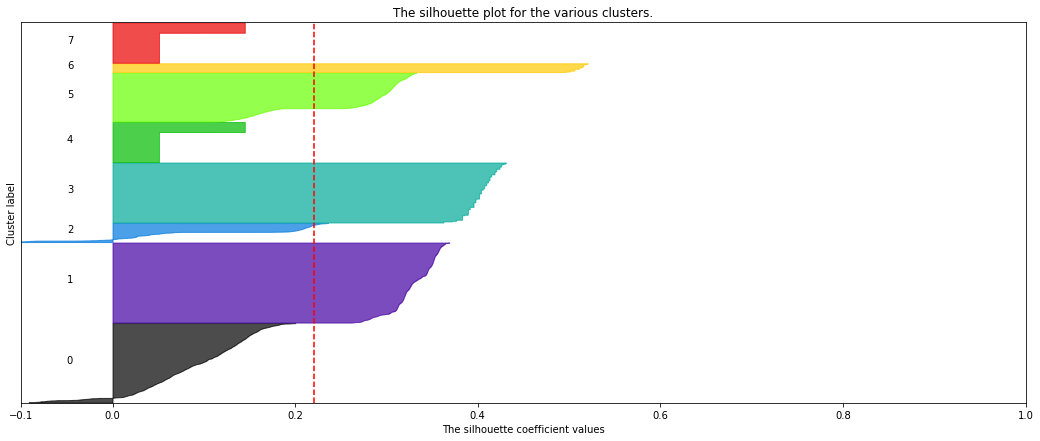

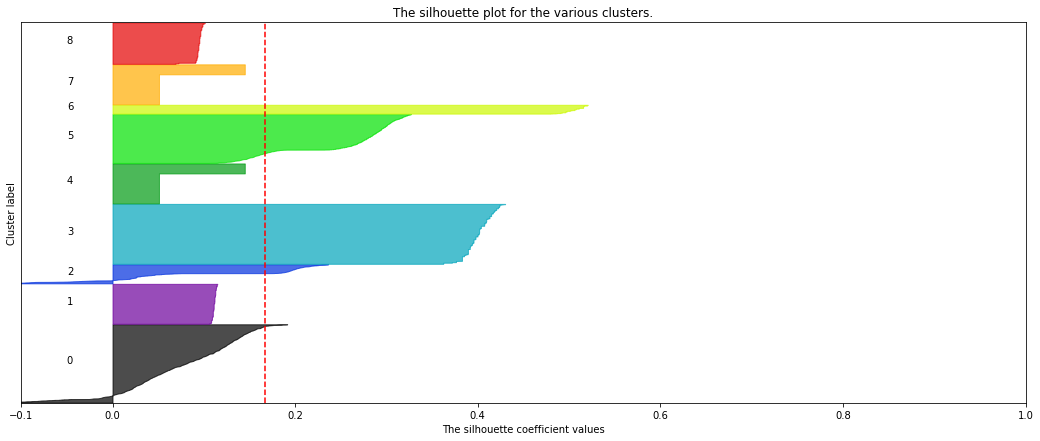

In [338]:
X = mush_rescaled

range_n_clusters = [2, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [339]:
# Davies Bouldin Score
X = mush_rescaled

range_n_clusters = [2, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average davies_bouldin_score is :", davies_bouldin_avg)

For n_clusters = 2 The average davies_bouldin_score is : 1.5913287944314094
For n_clusters = 4 The average davies_bouldin_score is : 1.8259582905165637
For n_clusters = 5 The average davies_bouldin_score is : 1.8752512326052766
For n_clusters = 6 The average davies_bouldin_score is : 1.8506259831492053
For n_clusters = 7 The average davies_bouldin_score is : 1.9169807306498305
For n_clusters = 8 The average davies_bouldin_score is : 2.22934062987116
For n_clusters = 9 The average davies_bouldin_score is : 2.4206270037726823
For n_clusters = 10 The average davies_bouldin_score is : 2.3255167026616728


# Dimensionality Reduction

In [340]:
def select_n_components(model):
    cum_var = np.cumsum(model.explained_variance_ratio_)
    return next(x for x, val in enumerate(cum_var)if val > 0.9) + 1

## PCA
- https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

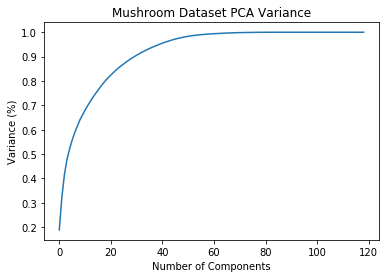

In [341]:
pca = PCA().fit(mush_rescaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Mushroom Dataset PCA Variance')
plt.show()

In [342]:
pca_num_components = select_n_components(pca)

## ICA
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html

1) Loop where n_components is 1 up to num_features_for_clustering-1

2)   fastICA(n_components).

3)   x_transform = fastICA.fit_transform(x).

4)   kurtosis_vals = scipy.stats.kurtosis(x_transform). 

5)   Get the means of all kurtosis_vals[i]*kurtosis_vals[i] (to avoid neg and pos cancelling each other).

6) Pick the n_components with the biggest mean kurtosis... i.e. most kurtotic.

In [344]:
mush_ica = {}

for num in range(3,119):
    ica = FastICA(n_components=num)
    x_transform = ica.fit_transform(mush_rescaled)
    kurtosis_vals = scipy.stats.kurtosis(x_transform)
    mush_ica[num] = np.mean(kurtosis_vals*kurtosis_vals)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceW

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceW

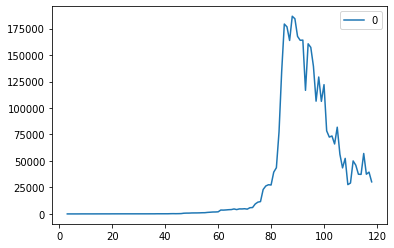

In [345]:
pd.DataFrame(mush_ica.values(), index=range(3,119)).plot()

In [302]:
most_kurtotic = max(mush_ica, key=mush_ica.get)
print("most kurtotic n_components: {}".format(most_kurtotic))
ica_num_components = most_kurtotic
mush_ica[most_kurtotic]

most kurtotic n_components: 87


198868.80944754367

## Randomized Projections
- https://scikit-learn.org/stable/modules/random_projection.html

In [346]:
mush_rp = {}

for num in range(3,119):
    srp = GaussianRandomProjection(n_components=num)
    x_transform = srp.fit_transform(mush_rescaled)
    kurtosis_vals = scipy.stats.kurtosis(x_transform)
    mush_rp[num] = np.mean(kurtosis_vals*kurtosis_vals)


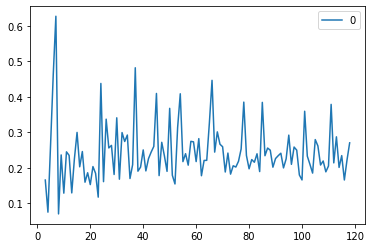

In [347]:
pd.DataFrame(mush_rp.values(), index=range(3,119)).plot()

In [348]:
most_kurtotic = max(mush_rp, key=mush_rp.get)
print("most kurtotic n_components: {}".format(most_kurtotic))
rp_num_components = most_kurtotic
mush_rp[most_kurtotic]

most kurtotic n_components: 7


0.627030369151022

## Linear Discriminant Analysis
- https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
- https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2

In [ ]:
X_scaled = preprocessing.normalize(feature_df)

In [285]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_scaled, target_outcome)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

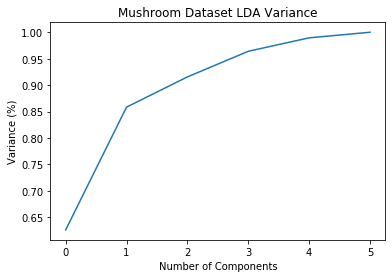

In [288]:
plt.figure()
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Mushroom Dataset LDA Variance')
plt.show()

In [300]:
lda_num_components = select_n_components(lda)

# Clustering after Dimensionality Reduction

- for [PCA, ICA, Randomized Projections, LDA]
    - apply [KMeans, EM]

In [318]:
dim_reduce = {'pca': PCA(n_components=pca_num_components), # variance
                'ica': FastICA(n_components=ica_num_components), # kurtosis
                'rp': GaussianRandomProjection(n_components=rp_num_components), # kurtosis
                'lda': LinearDiscriminantAnalysis(n_components=lda_num_components)} # variance

cluster = {'kmeans': KMeans(n_clusters=9, random_state=10), # silhouette
              'em': GaussianMixture(n_components=7, random_state=10)}

In [324]:
for dr_name, dr_func in dim_reduce.items():
    if dr_name == 'lda':
        dr_dims = dr_func.fit_transform(X_train, y_train)
    else:
        dr_dims = dr_func.fit_transform(mush_rescaled)
        
    for c_name, c_func in cluster.items():
        cluster_labels = c_func.fit_predict(dr_dims)
        silhouette_avg = silhouette_score(dr_dims, cluster_labels)
        print("The average silhouette_score for {} {} is :".format(c_name, dr_name), silhouette_avg)

The average silhouette_score for kmeans pca is : 0.490505652414623
The average silhouette_score for em pca is : 0.5200055129899112


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


The average silhouette_score for kmeans ica is : -0.01834813739053007
The average silhouette_score for em ica is : 0.01576260192196611
The average silhouette_score for kmeans rp is : 0.2802897502742752
The average silhouette_score for em rp is : 0.26066725868819135
The average silhouette_score for kmeans lda is : 0.8368339989925786
The average silhouette_score for em lda is : 0.7726335241335848


# Dataset - Kiva

In [325]:

# Import Datasets
kiva_df = pd.read_csv('data/kiva_loans.csv')
kiva_df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [326]:
# Frequency distribution of sector classes
pd.crosstab(index=kiva_df["sector"], columns="count")

col_0,count
sector,
Agriculture,180302
Arts,12060
Clothing,32742
Construction,6268
Education,31013
Entertainment,830
Food,136657
Health,9223
Housing,33731


In [327]:
# Add new `days_to_fund` feature
kiva_df['days_to_fund'] = (pd.to_datetime(kiva_df.funded_time) - pd.to_datetime(kiva_df.posted_time)).dt.days
kiva_df = kiva_df[kiva_df.days_to_fund >= 0]

In [328]:
# Add new count features `female_borrowers` and `male_borrowers`

def recipient_genders(x):
    lst = x.replace(" ", "").split(',') if not pd.isna(x) else []
    return lst.count('female'), lst.count('male')

gender_counts = kiva_df.borrower_genders.apply(recipient_genders).str
kiva_df.loc[:, 'female_borrowers'] = gender_counts[0]
kiva_df.loc[:, 'male_borrowers'] = gender_counts[1]

In [329]:
# Add target feature `is_agricultural_loan` to dataframe
kiva_df['is_agricultural_loan'] = np.where(kiva_df['sector']=='Agriculture', True, False)

In [330]:
# Select a subset of features to exclude timeseries data
rel_cols = ['days_to_fund', 'funded_amount', 'loan_amount', 'term_in_months', 'repayment_interval','female_borrowers', 'male_borrowers', 'activity', 'country', 'is_agricultural_loan']
kiva_subset = kiva_df[rel_cols].copy()
kiva_subset.head()

,days_to_fund,funded_amount,loan_amount,term_in_months,repayment_interval,female_borrowers,male_borrowers,activity,country,is_agricultural_loan
0,1.0,300.0,300.0,12.0,irregular,1,0,Fruits & Vegetables,Pakistan,False
1,1.0,575.0,575.0,11.0,irregular,2,0,Rickshaw,Pakistan,False
2,0.0,150.0,150.0,43.0,bullet,1,0,Transportation,India,False
3,0.0,200.0,200.0,11.0,irregular,1,0,Embroidery,Pakistan,False
4,0.0,400.0,400.0,14.0,monthly,1,0,Milk Sales,Pakistan,False


In [331]:
# In order to reduce training times, I sampled 50,000 rows from the data
kiva_subset = kiva_subset.sample(n=50000, random_state=1)

In [332]:
# Create feature and target dataframes
# - apply one-hot encoding to categorical columns
# - separate the feature and target data
kiva_feature_cols = kiva_subset.drop(columns = ['is_agricultural_loan']).columns
kiva_features = pd.get_dummies(kiva_subset[kiva_feature_cols], prefix='', prefix_sep='')
kiva_target = kiva_subset[['is_agricultural_loan']]
kiva_final = pd.get_dummies(kiva_subset, prefix='', prefix_sep='')

In [349]:
kiva_rescaled = preprocessing.normalize(kiva_final)

In [369]:
kiva_subset.groupby('activity').count()

,days_to_fund,funded_amount,loan_amount,term_in_months,repayment_interval,female_borrowers,male_borrowers,country,is_agricultural_loan
activity,,,,,,,,,
Agriculture,1955,1955,1955,1955,1955,1955,1955,1955,1955
Air Conditioning,4,4,4,4,4,4,4,4,4
Animal Sales,668,668,668,668,668,668,668,668,668
Aquaculture,7,7,7,7,7,7,7,7,7
Arts,83,83,83,83,83,83,83,83,83
...,...,...,...,...,...,...,...,...,...
Water Distribution,52,52,52,52,52,52,52,52,52
Weaving,224,224,224,224,224,224,224,224,224
Wedding Expenses,20,20,20,20,20,20,20,20,20


# Clustering

## k-means clustering

- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

For n_clusters = 2 The average silhouette_score is : 0.9439588625565394
For n_clusters = 3 The average silhouette_score is : 0.5814218656318736
For n_clusters = 4 The average silhouette_score is : 0.5339213072004364


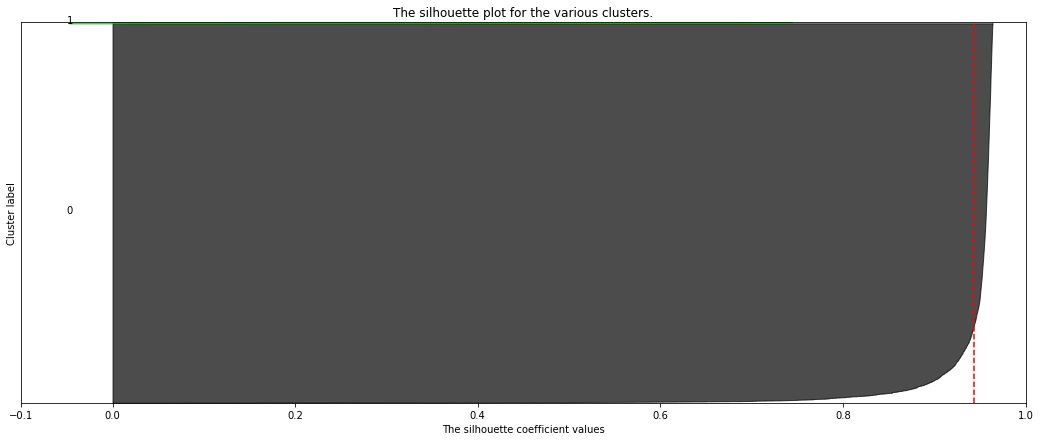

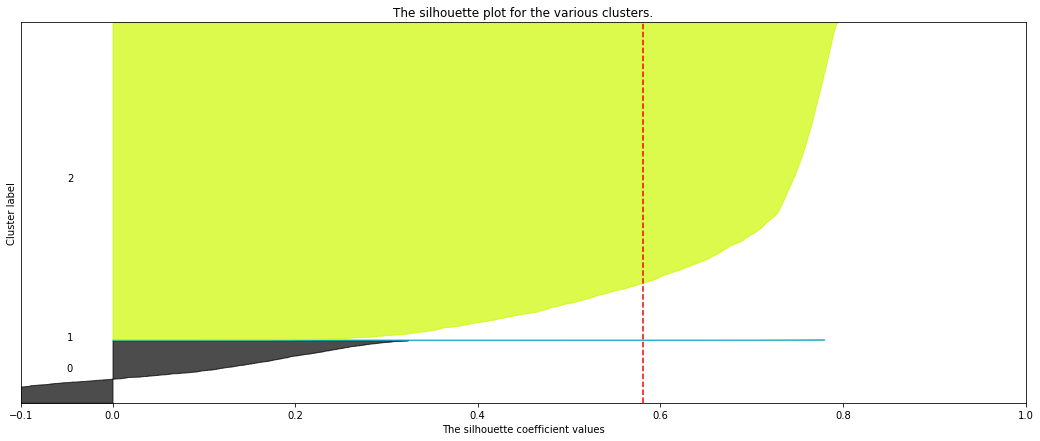

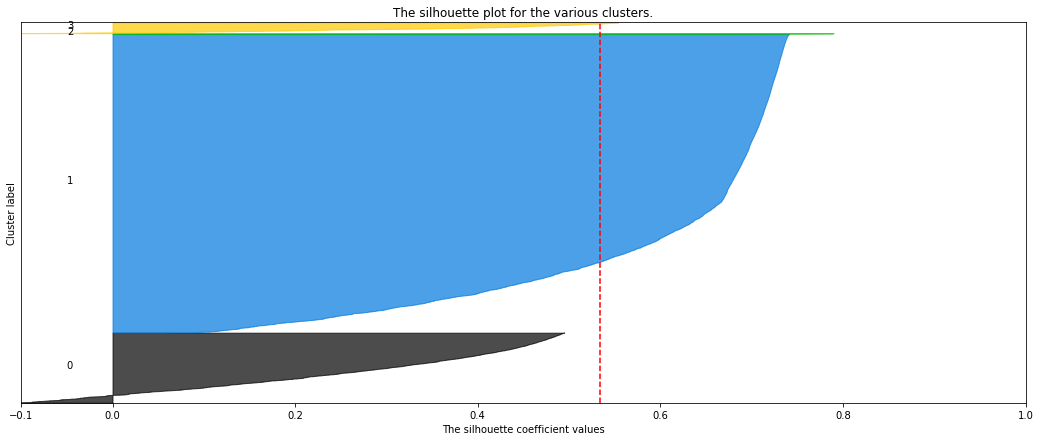

In [353]:
X = kiva_rescaled

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [354]:
# Davies Bouldin Score
X = kiva_rescaled

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average davies_bouldin_score is :", davies_bouldin_avg)

For n_clusters = 2 The average davies_bouldin_score is : 0.3278395495174846
For n_clusters = 3 The average davies_bouldin_score is : 0.8042698624737857
For n_clusters = 4 The average davies_bouldin_score is : 0.6823157528594592


## Expectation Maximization
- https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
- https://www.kaggle.com/charel/learn-by-example-expectation-maximization

For n_clusters = 2 The average silhouette_score is : 0.7386873668775786
For n_clusters = 3 The average silhouette_score is : 0.5792876775789385
For n_clusters = 4 The average silhouette_score is : 0.4628686635955095
For n_clusters = 5 The average silhouette_score is : 0.4805195417312234


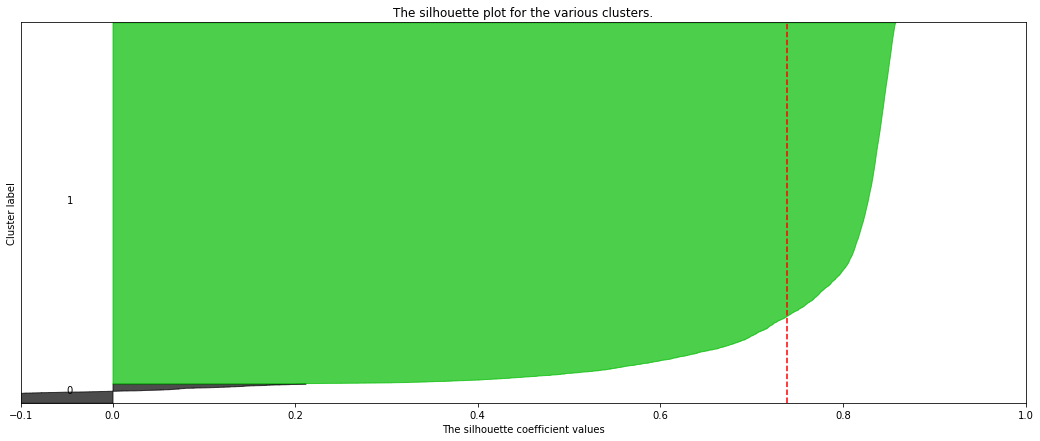

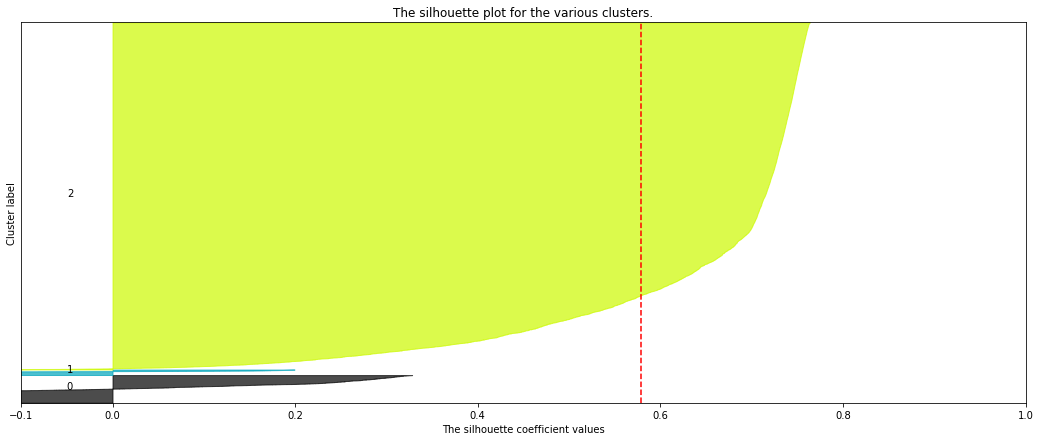

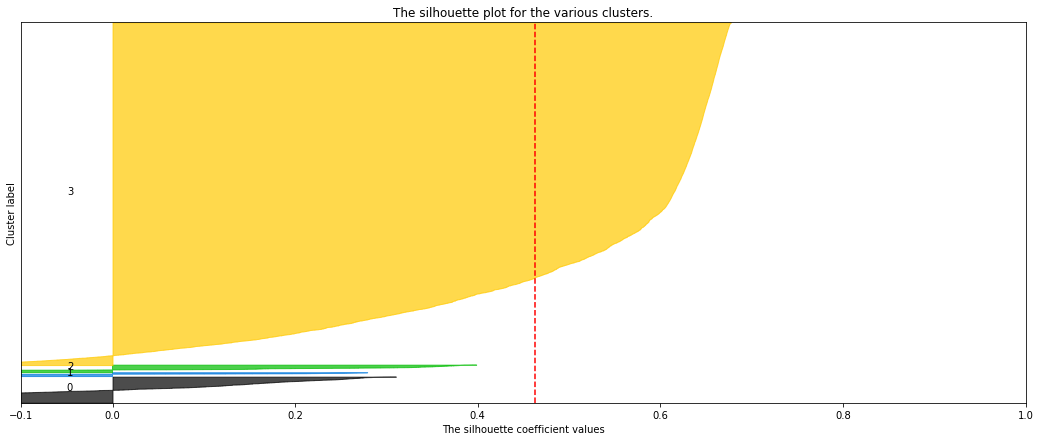

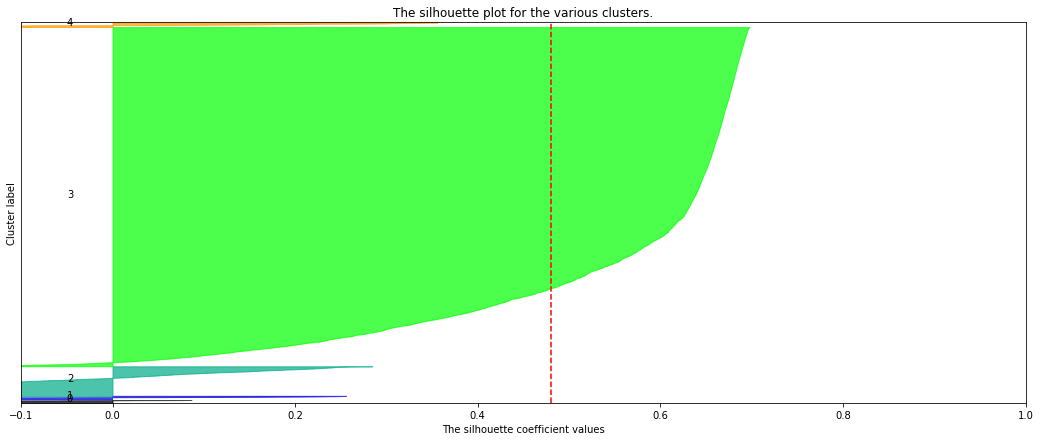

In [355]:
X = kiva_rescaled

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [362]:
# Davies Bouldin Score
X = kiva_rescaled

range_n_clusters = [2, 3, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average davies_bouldin_score is :", davies_bouldin_avg)

For n_clusters = 2 The average davies_bouldin_score is : 1.2531096227038532
For n_clusters = 3 The average davies_bouldin_score is : 1.3961644875363781
For n_clusters = 6 The average davies_bouldin_score is : 2.1384217085685466
For n_clusters = 7 The average davies_bouldin_score is : 2.4853695799975806
For n_clusters = 8 The average davies_bouldin_score is : 4.053811037332244
For n_clusters = 9 The average davies_bouldin_score is : 3.9313021489399773


# Dimensionality Reduction

In [357]:
def select_n_components(model):
    cum_var = np.cumsum(model.explained_variance_ratio_)
    return next(x for x, val in enumerate(cum_var)if val > 0.9) + 1

## PCA
- https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

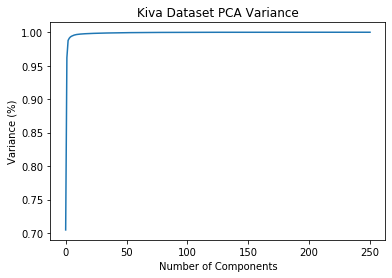

In [363]:
pca = PCA().fit(kiva_rescaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Kiva Dataset PCA Variance')
plt.show()

In [364]:
pca_num_components = select_n_components(pca)

## ICA
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html

1) Loop where n_components is 1 up to num_features_for_clustering-1

2)   fastICA(n_components).

3)   x_transform = fastICA.fit_transform(x).

4)   kurtosis_vals = scipy.stats.kurtosis(x_transform). 

5)   Get the means of all kurtosis_vals[i]*kurtosis_vals[i] (to avoid neg and pos cancelling each other).

6) Pick the n_components with the biggest mean kurtosis... i.e. most kurtotic.

In [375]:
kiva_ica = {}

for num in range(3,251):
    ica = FastICA(n_components=num)
    x_transform = ica.fit_transform(kiva_rescaled)
    kurtosis_vals = scipy.stats.kurtosis(x_transform)
    kiva_ica[num] = np.mean(kurtosis_vals*kurtosis_vals)


KeyboardInterrupt: 

In [376]:
kiva_ica

{3: 200594.30431513532,
 4: 152222.48432282385,
 5: 120966.99332598031,
 6: 101303.2275781611,
 7: 90183.99262217557,
 8: 80281.34485705046,
 9: 69573.29328804108,
 10: 64133.05492867952,
 11: 58698.536138244235,
 12: 55455.953906728966,
 13: 51659.040005130824,
 14: 49119.23496454058,
 15: 46548.968608400784,
 16: 16968.05563409835,
 17: 47515.35463506866,
 18: 48000.17589648544,
 19: 51970.816703873534,
 20: 54460.236755939855,
 21: 55595.548217261174,
 22: 57434.212449627295,
 23: 64983.77451595653,
 24: 78653.82732359067,
 25: 64478.08878558705,
 26: 65810.688749917,
 27: 63409.78763355272,
 28: 62046.204950038045,
 29: 76517.42776083885,
 30: 63668.743758572135,
 31: 87055.04167828463,
 32: 123607.46347135583,
 33: 151407.1139780603,
 34: 257354.84682250005,
 35: 288624.8611044857,
 36: 264445.79893523664,
 37: 264578.57895185257,
 38: 242849.14103423044,
 39: 299599.5604491854,
 40: 323288.7534800208,
 41: 301321.38167788734,
 42: 250382.75936830338,
 43: 549157.2697428634,
 44: 

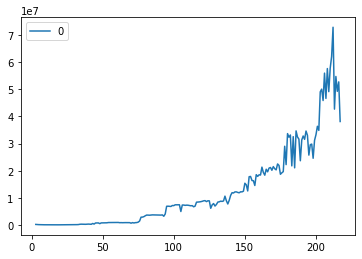

In [379]:
pd.DataFrame(kiva_ica.values(), index=range(3,218)).plot()

In [380]:
most_kurtotic = max(kiva_ica, key=kiva_ica.get)
print("most kurtotic n_components: {}".format(most_kurtotic))
ica_num_components = most_kurtotic
kiva_ica[most_kurtotic]

most kurtotic n_components: 212


72853385.7763386

## Randomized Projections
- https://scikit-learn.org/stable/modules/random_projection.html

In [381]:
kiva_rp = {}

for num in range(3,251):
    srp = GaussianRandomProjection(n_components=num)
    x_transform = srp.fit_transform(kiva_rescaled)
    kurtosis_vals = scipy.stats.kurtosis(x_transform)
    kiva_rp[num] = np.mean(kurtosis_vals*kurtosis_vals)


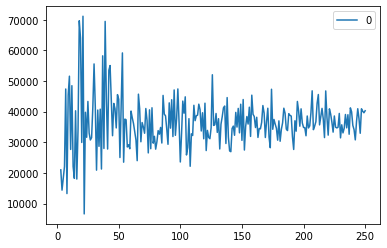

In [382]:
pd.DataFrame(kiva_rp.values(), index=range(3,251)).plot()

In [383]:
most_kurtotic = max(kiva_rp, key=kiva_rp.get)
print("most kurtotic n_components: {}".format(most_kurtotic))
rp_num_components = most_kurtotic
kiva_rp[most_kurtotic]

most kurtotic n_components: 21


71138.1242745328

## Linear Discriminant Analysis
- https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
- https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2

In [396]:
X_scaled = preprocessing.normalize(kiva_features)

In [397]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_scaled, np.ravel(kiva_target))

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

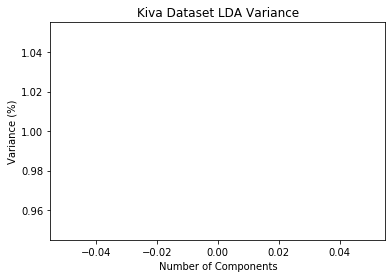

In [398]:
plt.figure()
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Kiva Dataset LDA Variance')
plt.show()

In [399]:
lda.explained_variance_ratio_

array([1.])

In [400]:
lda_num_components = select_n_components(lda)

# Clustering after Dimensionality Reduction

- for [PCA, ICA, Randomized Projections, LDA]
    - apply [KMeans, EM]

In [402]:
dim_reduce = {'pca': PCA(n_components=pca_num_components), # variance
                'ica': FastICA(n_components=ica_num_components), # kurtosis
                'rp': GaussianRandomProjection(n_components=rp_num_components), # kurtosis
                'lda': LinearDiscriminantAnalysis(n_components=lda_num_components)} # variance

cluster = {'kmeans': KMeans(n_clusters=8, random_state=10), # silhouette
              'em': GaussianMixture(n_components=3, random_state=10)}

In [404]:
for dr_name, dr_func in dim_reduce.items():
    if dr_name == 'lda':
        dr_dims = dr_func.fit_transform(X_scaled, np.ravel(kiva_target))
    else:
        dr_dims = dr_func.fit_transform(kiva_rescaled)
        
    for c_name, c_func in cluster.items():
        cluster_labels = c_func.fit_predict(dr_dims)
        silhouette_avg = silhouette_score(dr_dims, cluster_labels)
        print("The average silhouette_score for {} {} is :".format(c_name, dr_name), silhouette_avg)

The average silhouette_score for kmeans pca is : 0.4585114062732522
The average silhouette_score for em pca is : 0.4186387487292256
The average silhouette_score for kmeans ica is : -0.06570961631258941
The average silhouette_score for em ica is : 0.09904986929208406
The average silhouette_score for kmeans rp is : 0.4011665110274891
The average silhouette_score for em rp is : 0.5086824101724363
The average silhouette_score for kmeans lda is : 0.5467073849685465
The average silhouette_score for em lda is : 0.6430531586922246


# Neural Network Learner with Dimensionality Reduction (One Dataset)


# Neural Network Learner with Dimensionality Reduction and Clustering (One Dataset)
